In [1]:
# Import Libraries

In [2]:
from nltk.tokenize import word_tokenize
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import os
import nltk
import pandas as pd
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics
from sklearn.svm import SVC

In [3]:
all_file = []

for i in range(1, 1096):
    ### read file
    doc_name = "~/NTUCourse/NTU-IM-ITM/HW-02/PA2-data/" + str(i) + ".txt"
    file = os.path.expanduser(doc_name)
    f = open(file)
    docs = f.read()
    #print(docs)
    
    ### lowerize
    token_lower = docs.lower()
    #print(token_lower)
    token = token_lower.replace('\n', '')    
    all_file.append([i, token])
    
docs = pd.DataFrame(all_file, columns = ['id', 'text'])
#print(docs['text'][0])
#print(docs)
#docs.head()

In [4]:
print(len(docs))

1095


In [5]:
classes = [[11, 19, 29, 113, 115, 169, 278, 301, 316, 317, 321, 324, 325, 338, 341],
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16] ,
[813, 817, 818, 819, 820, 821, 822, 824, 825, 826, 828, 829, 830, 832, 833], 
[635, 680, 683, 702, 704, 705, 706, 708, 709, 719, 720, 722, 723, 724, 726], 
[646, 751, 781, 794, 798, 799, 801, 812, 815, 823, 831, 839, 840, 841, 842],
[995, 998, 999, 1003, 1005, 1006, 1007, 1009, 1011, 1012, 1013, 1014, 1015, 1016, 1019],
[700, 730, 731, 732, 733, 735, 740, 744, 752, 754, 755, 756, 757, 759, 760], 
[262, 296, 304, 308, 337, 397, 401, 443, 445, 450, 466, 480, 513, 533, 534], 
[130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 145], 
[31, 44, 70, 83, 86, 92, 100, 102, 305, 309, 315, 320, 326, 327, 328], 
[240, 241, 243, 244, 245, 248, 250, 254, 255, 256, 258, 260, 275, 279, 295], 
[535, 542, 571, 573, 574, 575, 576, 578, 581, 582, 583, 584, 585, 586, 588], 
[485, 520, 523, 526, 527, 529, 530, 531, 532, 536, 537, 538, 539, 540, 541]]

print(len(classes))
labels = []
for q in range(0, len(docs)):
    for i in range(0, 13):
        for j in range(0, 15):
            if q + 1 == classes[i][j]:
                #print(q, q+1, i, classes[i], i+ 1)
                labels.append([classes[i][j], i+1])
#print(labels)
labels = pd.DataFrame(sorted(labels, key = lambda l:l[0]), columns = ['training_id', 'classes'])
print(labels)        
training_docs = docs[docs['id'].isin(labels['training_id'])]
#print(training_docs)
testing_docs = docs[~docs['id'].isin(labels['training_id'])]
print(testing_docs['id'])


13
     training_id  classes
0              1        2
1              2        2
2              3        2
3              4        2
4              5        2
..           ...      ...
190         1013        6
191         1014        6
192         1015        6
193         1016        6
194         1019        6

[195 rows x 2 columns]
16        17
17        18
19        20
20        21
21        22
        ... 
1090    1091
1091    1092
1092    1093
1093    1094
1094    1095
Name: id, Length: 900, dtype: int64


In [6]:
bn_vec = CountVectorizer(binary = True)
brn_nb = bn_vec.fit_transform(docs)
train_text = []
train_label = []
#print(training_docs['id'][20])
#for i in range(195):
    #print(training_docs['id'][i])

In [7]:
binary_vectorizer = CountVectorizer(binary = True)
binary_vectors = binary_vectorizer.fit_transform(training_docs['text'])
binary_vectors_test = binary_vectorizer.transform(testing_docs['text'])
x_train, x_test, y_train, y_test = train_test_split(binary_vectors, labels['classes'], test_size = 0.1)

In [8]:
model = BernoulliNB()
model.fit(x_train, y_train)
prediction = []
expectation = []
expectation.extend(y_test)
prediction.extend(model.predict(x_test))

print("Precision, Recall, and F1 scores are as below.")
print(metrics.classification_report(expectation, prediction))
print("F1 scores =", metrics.f1_score(expectation, prediction, average='weighted'))
print("Precision =", metrics.precision_score(expectation, prediction, average='weighted'))
print("recall =", metrics.recall_score(expectation, prediction, average ='weighted'))

Precision, Recall, and F1 scores are as below.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       1.00      0.50      0.67         2
           3       1.00      0.25      0.40         4
           5       1.00      0.50      0.67         4
           6       0.33      1.00      0.50         1
           7       1.00      1.00      1.00         1
           8       0.14      1.00      0.25         1
          11       1.00      0.50      0.67         2
          12       1.00      0.67      0.80         3

    accuracy                           0.60        20
   macro avg       0.83      0.71      0.66        20
weighted avg       0.92      0.60      0.65        20

F1 scores = 0.6541666666666667
Precision = 0.9238095238095237
recall = 0.6


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:681: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:681: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:681: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:681: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


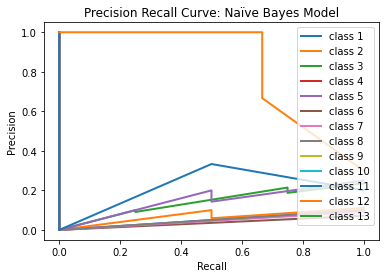

<Figure size 432x288 with 0 Axes>

In [9]:
precision = dict() 
recall = dict() 
for i in range(13):
    precision[i], recall[i], thresholds = metrics.precision_recall_curve(expectation, prediction, pos_label = (i + 1))
    plt.plot(recall[i], precision[i], lw = 2, label = 'class {}'.format(i + 1))

plt.xlabel("Recall") 
plt.ylabel("Precision")
plt.legend(loc = "upper right")
plt.title("Precision Recall Curve: Naïve Bayes Model")
plt.show()
plt.savefig('P.png')

In [10]:
# Below is SVM Linear

In [11]:
TFIDF_vectorizer = TfidfVectorizer(stop_words = 'english')
TFIDF_vectors_training = TFIDF_vectorizer.fit_transform(training_docs['text'])
TFIDF_vectors_testing  = TFIDF_vectorizer.transform(testing_docs['text'])

x_train, x_test, y_train, y_test = train_test_split(TFIDF_vectors_training, labels['classes'], test_size = 0.1)
SVC_Linear_model = SVC(kernel='linear', C = 1.0)
SVC_Linear_model.fit(x_train, y_train)

prediction = []
expectation = []

expectation.extend(y_test)
prediction.extend(SVC_Linear_model.predict(x_test))

print("Precision, Recall, and F1 scores are as below.")
print(metrics.classification_report(expectation, prediction))
print("F1 scores :", metrics.f1_score(expectation, prediction, average='weighted'))
print("Precision :", metrics.precision_score(expectation, prediction, average='weighted'))
print("recall :", metrics.recall_score(expectation, prediction, average ='weighted'))

Precision, Recall, and F1 scores are as below.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

F1 scores : 1.0
Precision : 1.0
recall : 1.0


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:681: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:681: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:681: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


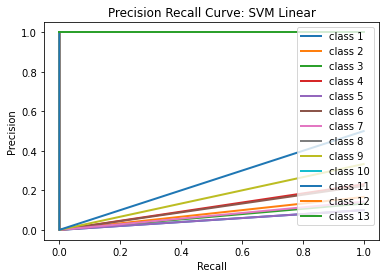

In [12]:
precision = dict() 
recall = dict() 
for i in range(13):
    precision[i], recall[i], thresholds = metrics.precision_recall_curve(expectation, prediction, pos_label = (i + 1))
    plt.plot(recall[i], precision[i], lw = 2, label = 'class {}'.format(i + 1))

plt.xlabel("Recall") 
plt.ylabel("Precision")
plt.legend(loc = "upper right")
plt.title("Precision Recall Curve: SVM Linear")
plt.show()


In [13]:
# below is SVM RBF

In [14]:
TFIDF_vectorizer = TfidfVectorizer(stop_words = 'english')
TFIDF_vectors_training = TFIDF_vectorizer.fit_transform(training_docs['text'])
TFIDF_vectors_testing  = TFIDF_vectorizer.transform(testing_docs['text'])

x_train, x_test, y_train, y_test = train_test_split(TFIDF_vectors_training, labels['classes'], test_size = 0.1)
SVC_RBF_model = SVC(kernel='rbf', gamma = 'scale', C = 1.0)
SVC_RBF_model.fit(x_train, y_train)

prediction = []
expectation = []

expectation.extend(y_test)
prediction.extend(SVC_RBF_model.predict(x_test))

print("Precision, Recall, and F1 scores are as below.")
print(metrics.classification_report(expectation, prediction))
print("F1 scores :", metrics.f1_score(expectation, prediction, average='weighted'))
print("Precision :", metrics.precision_score(expectation, prediction, average='weighted'))
print("recall :", metrics.recall_score(expectation, prediction, average ='weighted'))

Precision, Recall, and F1 scores are as below.
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         1
           6       0.50      1.00      0.67         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         4
          12       0.00      0.00      0.00         1
          13       1.00      1.00      1.00         2

    accuracy                           0.95        20
   macro avg       0.86      0.91      0.88        20
weighted avg       0.93      0.95      0.93        20

F1 scores : 0.9333333333333332
Precision : 0.925
recall : 0.95


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:681: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:681: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


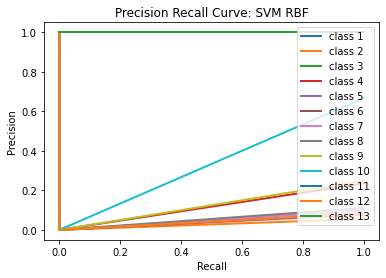

In [15]:
precision = dict() 
recall = dict() 
for i in range(13):
    precision[i], recall[i], thresholds = metrics.precision_recall_curve(expectation, prediction, pos_label = (i + 1))
    plt.plot(recall[i], precision[i], lw = 2, label = 'class {}'.format(i + 1))

plt.xlabel("Recall") 
plt.ylabel("Precision")
plt.legend(loc = "upper right")
plt.title("Precision Recall Curve: SVM RBF")
plt.show()

#print("F1 scores :", metrics.f1_score(expectation, prediction, average='weighted'))
#print("Precision :", metrics.precision_score(expectation, prediction, average='weighted'))
#print("Recall :", metrics.recall_score(expectation, prediction, average ='weighted'))

In [16]:
result = []
output = []
result.extend(SVC_RBF_model.predict(TFIDF_vectors_testing))
pd.DataFrame(result).to_csv('svmRbf.csv', index = True)
print(result[3])
print(len(result))
#output.append(testing_docs['id'])
#print(output)
#print(testing_docs.at(9, 'id'))
for i in range(900):
    value = int(testing_docs.iloc[i]["id"])
    output.append([value, str(result[i])])

print(output[0][1])

2
900
2


In [17]:
import csv
with open('output_svm_rbf.csv', 'w', newline = '') as rbf:
    writer = csv.writer(rbf)
    writer.writerow(["Id", "Value"])
    writer.writerows(output)


In [18]:
result = []
output = []
result.extend(SVC_Linear_model.predict(TFIDF_vectors_testing))
pd.DataFrame(result).to_csv('svmRbf.csv', index = True)
print(result[3])
print(len(result))
#output.append(testing_docs['id'])
#print(output)
#print(testing_docs.at(9, 'id'))
for i in range(900):
    value = int(testing_docs.iloc[i]["id"])
    output.append([value, str(result[i])])

print(output[0][1])
import csv
with open('output_svm_linear.csv', 'w', newline = '') as rbf:
    writer = csv.writer(rbf)
    writer.writerow(["Id", "Value"])
    writer.writerows(output)



2
900
2


In [19]:
# below can be ignored.

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(TFIDF_vectors, labels['classes'], test_size = 0.1)
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_prob = model.predict_proba(x_test)
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))


NameError: name 'TFIDF_vectors' is not defined

In [ ]:
testing_TFIDF = TFIDF_vectorizer.transform(testing_docs['text'])
prediction = model.predict(testing_TFIDF)
results = pd.DataFrame(prediction, columns = ['Value'])
print(results)
pd.DataFrame(results).to_csv('output.csv', index = False)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
binary_vectorizer = CountVectorizer(binary=True)
training_binary_vectors = binary_vectorizer.fit_transform(training_docs['text'])
print(training_binary_vectors.toarray())
testing_binary_vectors = binary_vectorizer.fit_transform(testing_docs['text'])
print(testing_binary_vectors.toarray())


In [ ]:
from sklearn.naive_bayes import BernoulliNB
model_b = BernoulliNB()
model_b.fit(training_binary_vectors, labels['classes'])

In [ ]:
predicted_b = []
predicted_b.extend(model_b.predict(testing_binary_vectors))
from sklearn.metrics import precision_recall_curve
from sklearn import metrics
print(metrics.classification_report(expected, preNB))